# 04 - Modelagem Básica (Previsão de Óbitos)

Este notebook realiza um experimento simples de previsão de **óbito por COVID-19**  
a partir do dataset processado (`df_parcial.parquet`).

Etapas:
1. Carregar dataset.
2. Checagens básicas.
3. Preparar variáveis (features e target).
4. Treinar rede neural básica (MLP).
5. Avaliar desempenho.
6. Interpretar importância das variáveis (Permutation Importance).


In [1]:
# Imports principais
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
# 1. Carregar dataset
df = pd.read_parquet("../data/processed/df_parcial.parquet")
print("Shape:", df.shape)
df.info()

Shape: (517995, 37)
<class 'pandas.core.frame.DataFrame'>
Index: 517995 entries, 0 to 3619476
Data columns (total 37 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   sintomas                           517987 non-null  object 
 1   profissionalsaude                  517986 non-null  float64
 2   racacor                            517470 non-null  object 
 3   profissionalseguranca              517165 non-null  float64
 4   sexo                               517993 non-null  float64
 5   estado                             517995 non-null  object 
 6   estadoibge                         504104 non-null  object 
 7   municipio                          517995 non-null  object 
 8   municipioibge                      503988 non-null  object 
 9   origem                             517995 non-null  object 
 10  estadonotificacao                  517995 non-null  object 
 11  municipionotificacao   

In [7]:
# 2. Checagem rápida da variável alvo
print("\nDistribuição evolucaocaso:")
print(df["evolucaocaso"].value_counts(dropna=False))



Distribuição evolucaocaso:
evolucaocaso
Cura                        440831
Em tratamento domiciliar     36678
Ignorado                     36400
Cancelado                     2876
Óbito                          586
Internado                      537
Internado em UTI                87
Name: count, dtype: int64


In [11]:
# 3. Criar target binário (ÓBITO vs Outros)
df = df[df["evolucaocaso"].notna()].copy()
df["target_obito"] = np.where(df["evolucaocaso"].str.contains("Óbito", case=False, na=False), 1, 0)


In [12]:
print("\nDistribuição target:")
print(df["target_obito"].value_counts())




Distribuição target:
target_obito
0    517409
1       586
Name: count, dtype: int64


In [16]:
print("=== Inspeção Geral de Colunas ===")

for col in df.columns:
    nun = df[col].nunique(dropna=True)
    tipo = df[col].dtype
    print(f"\n[{col}]  tipo={tipo}  (nunique={nun})")

    # Mostra os 10 valores mais comuns
    print(df[col].value_counts(dropna=False).head(10))



=== Inspeção Geral de Colunas ===

[sintomas]  tipo=object  (nunique=4493)
sintomas
Assintomático                                           51778
Coriza, Dor de Cabeça, Tosse, Dor de Garganta           14231
Coriza, Tosse                                           13888
Outros                                                  12092
Tosse                                                   11165
Coriza, Dor de Cabeça, Tosse                             9480
Coriza, Tosse, Dor de Garganta                           9111
Coriza, Tosse, Febre                                     8736
Coriza                                                   8697
Coriza, Dor de Cabeça, Tosse, Febre, Dor de Garganta     7828
Name: count, dtype: int64

[profissionalsaude]  tipo=float64  (nunique=2)
profissionalsaude
0.0    506048
1.0     11938
NaN         9
Name: count, dtype: int64

[racacor]  tipo=object  (nunique=6)
racacor
Branca      259075
Ignorado    109720
Parda       107273
Amarela      21021
Preta        20

In [13]:
# 4. Selecionar features numéricas (ex.: idade + variáveis codificadas)
features = df.select_dtypes(include=["int64","float64","Int64"]).drop(columns=["target_obito"], errors="ignore")
X = features.fillna(0)
y = df["target_obito"]

print("\nShape X:", X.shape, "Shape y:", y.shape)



Shape X: (517995, 13) Shape y: (517995,)


Iteration 1, loss = 0.39926842
Iteration 2, loss = 0.07702636
Iteration 3, loss = 0.09402577
Iteration 4, loss = 0.07572016
Iteration 5, loss = 0.09447429
Iteration 6, loss = 0.06411559
Iteration 7, loss = 0.09404561
Iteration 8, loss = 0.07621773
Iteration 9, loss = 0.07621293
Iteration 10, loss = 0.09508510
Iteration 11, loss = 0.07640561
Iteration 12, loss = 0.07671380
Iteration 13, loss = 0.09585638
Iteration 14, loss = 0.07643613
Iteration 15, loss = 0.07609013
Iteration 16, loss = 0.09436248
Iteration 17, loss = 0.07137698
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    155223
           1       0.00      0.00      0.00       176

    accuracy                           1.00    155399
   macro avg       0.50      0.50      0.50    155399
weighted avg       1.00      1.00      1.00    155399



c:\Users\lucia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\lucia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\lucia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

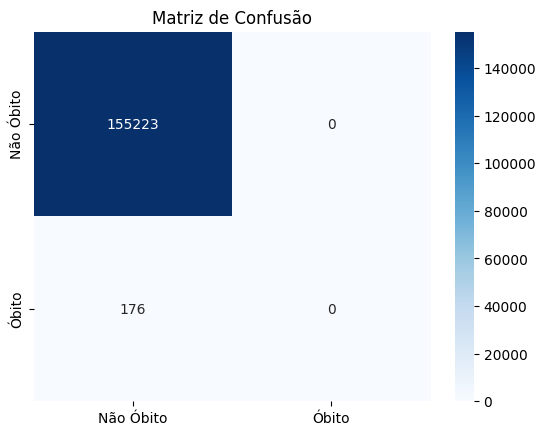


Top variáveis mais importantes:
                          feature  importance
0               profissionalsaude         0.0
1           profissionalseguranca         0.0
2                            sexo         0.0
3        municipionotificacaoibge         0.0
4           codigoestrategiacovid         0.0
5   codigolocalrealizacaotestagem         0.0
6             codigorecebeuvacina         0.0
7           totaltestesrealizados         0.0
8              codigoestadoteste1         0.0
9                codigotipoteste1         0.0
10         codigofabricanteteste1         0.0
11          codigoresultadoteste1         0.0
12                          idade         0.0


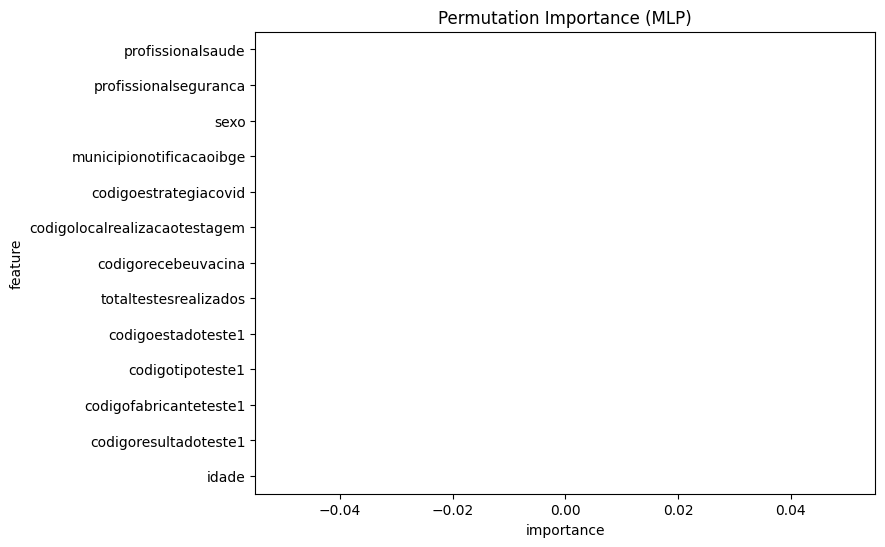

In [14]:

# 5. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 6. Modelo simples - MLP
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, random_state=42, verbose=True)
mlp.fit(X_train, y_train)

# 7. Avaliação
y_pred = mlp.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Óbito","Óbito"], yticklabels=["Não Óbito","Óbito"])
plt.title("Matriz de Confusão")
plt.show()

# 8. Permutation Importance
r = permutation_importance(mlp, X_test, y_test, n_repeats=5, random_state=42, n_jobs=-1)

importances = pd.DataFrame({"feature": X.columns, "importance": r.importances_mean})
importances = importances.sort_values("importance", ascending=False)

print("\nTop variáveis mais importantes:")
print(importances.head(15))

plt.figure(figsize=(8,6))
sns.barplot(data=importances.head(15), x="importance", y="feature")
plt.title("Permutation Importance (MLP)")
plt.show()
